# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn import metrics



## Loading CSV file and understanding data

In [2]:
df = pd.read_csv('data/GOOG.csv')

# Print head for brief view of data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927065
1,2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031925
2,2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226
3,2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876685
4,2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9484016


### Show Shape

In [3]:
df.shape

(2999, 7)

### Show info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2999 non-null   object 
 1   Open       2999 non-null   float64
 2   High       2999 non-null   float64
 3   Low        2999 non-null   float64
 4   Close      2999 non-null   float64
 5   Adj Close  2999 non-null   float64
 6   Volume     2999 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 164.1+ KB


### Summary Statistics of each column

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2.999000e+03
mean,854.399036,862.291979,846.694971,854.781267,854.781267,3.026443e+06
std,609.822856,615.744934,604.665546,610.494084,610.494084,2.597949e+06
min,218.336624,220.314209,216.005356,217.220810,217.220810,7.922000e+03
25%,368.959549,371.604629,364.683075,369.231033,369.231033,1.342950e+06
50%,701.619995,708.979980,694.000000,701.429993,701.429993,1.991200e+06
75%,1130.574951,1142.984985,1117.374024,1132.005005,1132.005005,4.098003e+06
max,3020.000000,3037.000000,2997.750000,3014.179932,3014.179932,2.976073e+07


## Data Preparation

### Dropping unneeded variables

In [6]:
df = df.drop(columns=['Adj Close'], axis = 1)

df.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,312.304413,313.579620,310.954468,312.204773,3927065
1,2010-01-05,312.418976,312.747742,309.609497,310.829926,6031925
2,2010-01-06,311.761444,311.761444,302.047852,302.994293,7987226
3,2010-01-07,303.562164,303.861053,295.218445,295.940735,12876685
4,2010-01-08,294.894653,300.498657,293.455048,299.885956,9484016


### Checking for null values

In [7]:
df.isnull().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [8]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Visualization

### Show Correlation bewteen all columns and relationships

In [9]:
print(df.corr())

            Open      High       Low     Close    Volume
Open    1.000000  0.999893  0.999880  0.999778 -0.493519
High    0.999893  1.000000  0.999847  0.999889 -0.492402
Low     0.999880  0.999847  1.000000  0.999903 -0.495470
Close   0.999778  0.999889  0.999903  1.000000 -0.494266
Volume -0.493519 -0.492402 -0.495470 -0.494266  1.000000


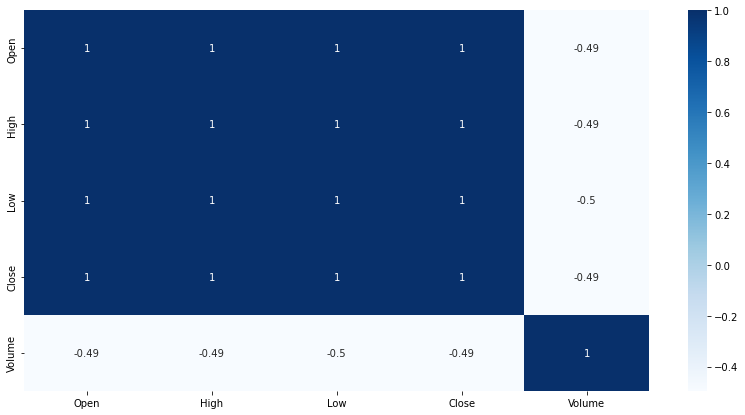

In [10]:
# Heat map
plt.figure(figsize=(14, 7))

sns.heatmap(df.corr(), cmap="Blues", annot = True)
plt.show()

### Histograms of Google

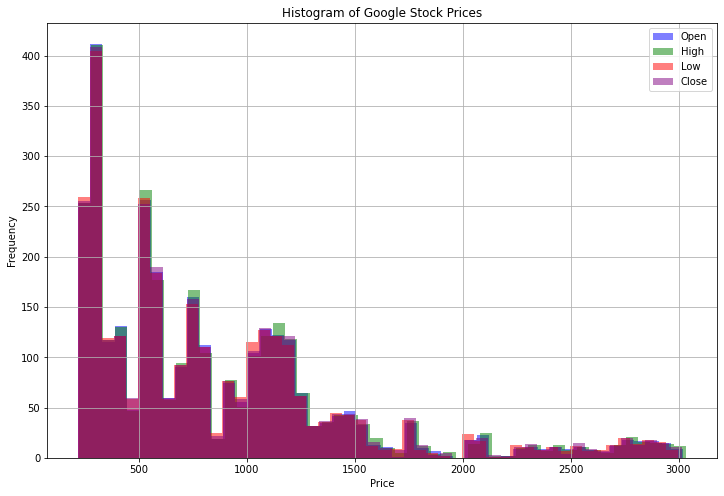

In [12]:
plt.figure(figsize=(12, 8))

# Plot histograms
plt.hist(df['Open'], bins=50, alpha=0.5, color='blue', label='Open')
plt.hist(df['High'], bins=50, alpha=0.5, color='green', label='High')
plt.hist(df['Low'], bins=50, alpha=0.5, color='red', label='Low')
plt.hist(df['Close'], bins=50, alpha=0.5, color='purple', label='Close')

# Adding title and labels
plt.title('Histogram of Google Stock Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Plotted Data

In [22]:
fig = go.Figure()

# Add traces for each price type
fig.add_trace(go.Scatter(x=df.index, y=df['Open'], mode='lines', name='Open', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df.index, y=df['High'], mode='lines', name='High', line=dict(color='green')))
fig.add_trace(go.Scatter(x=df.index, y=df['Low'], mode='lines', name='Low', line=dict(color='red')))
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close', line=dict(color='purple')))

# Update plot layout
fig.update_layout(
    title='Interactive Google Stock Prices Over Time',
    xaxis_title='Date',
    yaxis_title='Price',
    hovermode='x unified',  # Enables a single hover label for all lines at the nearest x-axis point
    template='plotly_white'  # Sets a clean, white background style
)

fig.show()

## Prepare for training

### Splitting dataset

In [19]:
x = df[['Open', 'High', 'Low', 'Volume']].values # Represents independent variables

y = df['Close'].values # Represents Dependent variables

### Split for % Train and % Test